<a href="https://colab.research.google.com/github/zardemostoles/zardemostoles-uoc.edu/blob/master/TFG_Crear_Modelo_AWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install efficientnet
import tensorflow as tf
import efficientnet.tfkeras as efn
from keras.models import load_model
tf.random.set_seed(33)
model = load_model('/content/drive/MyDrive/TFG/TFG_mejor_modelo.hdf5')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b4 (Functional  (None, 1792)             17673816  
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1792)              0         
                                                                 
 classify (Dense)            (None, 1)                 1793      
                                                                 
Total params: 17,675,609
Trainable params: 17,550,409
Non-trainable params: 125,200
_________________________________________________________________


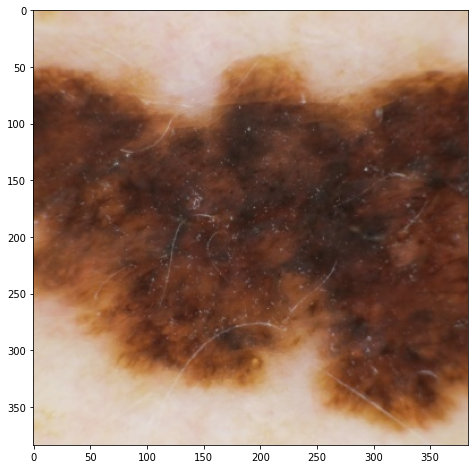

[0.9904763]


In [4]:
import PIL
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
image = PIL.Image.open("/content/drive/MyDrive/TFG/ISIC/ISIC_0053456.png")
plt.imshow(image)
plt.show()
tensor = tf.keras.utils.img_to_array(image) / 255
tensor = tf.expand_dims(tensor,0)
prediction = model.predict(tensor, verbose=0).flatten()
print(prediction)

In [5]:
!mkdir -p export/Servo/

# Note: This directory structure will need to be followed 
model_version = '1'
export_dir = 'export/Servo/' + model_version
model.save(export_dir)

In [6]:
import tarfile
model_archive = 'TFG_model.tar.gz'
with tarfile.open(model_archive, mode='w:gz') as archive:
    archive.add('export', recursive=True) 